This notebook demonstrates a data cleaning process in a real ETL pipeline. We are going to walk you through the cleaning tasks step by step.

Our input is a log file extracted from a real CNC machine:
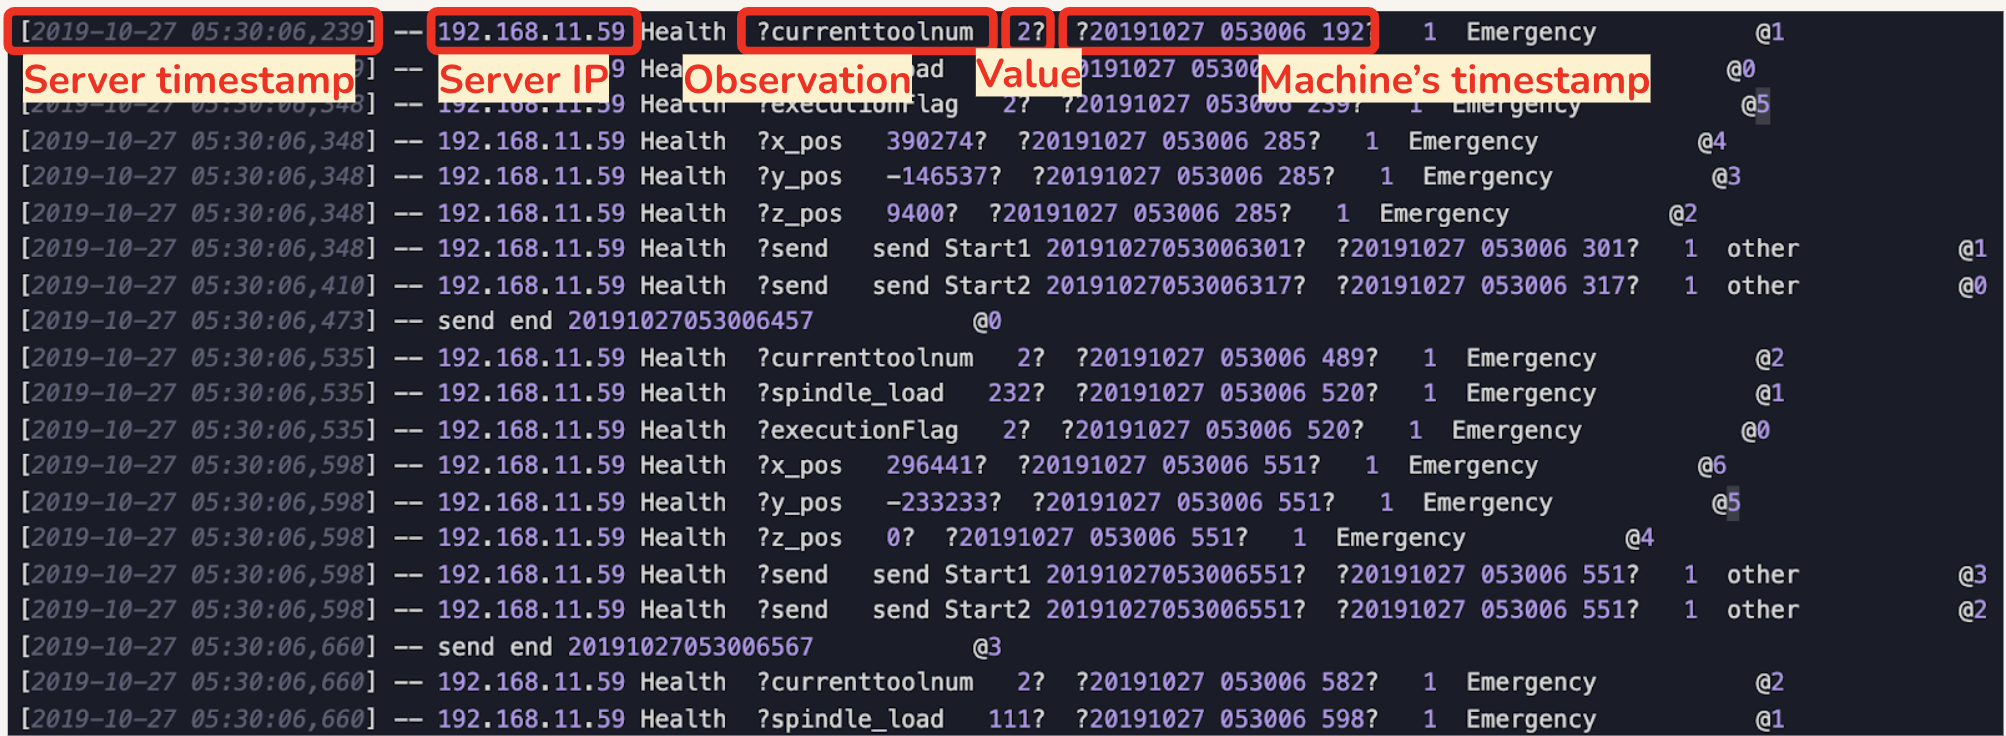

The desired output will be a CSV file that looks like:
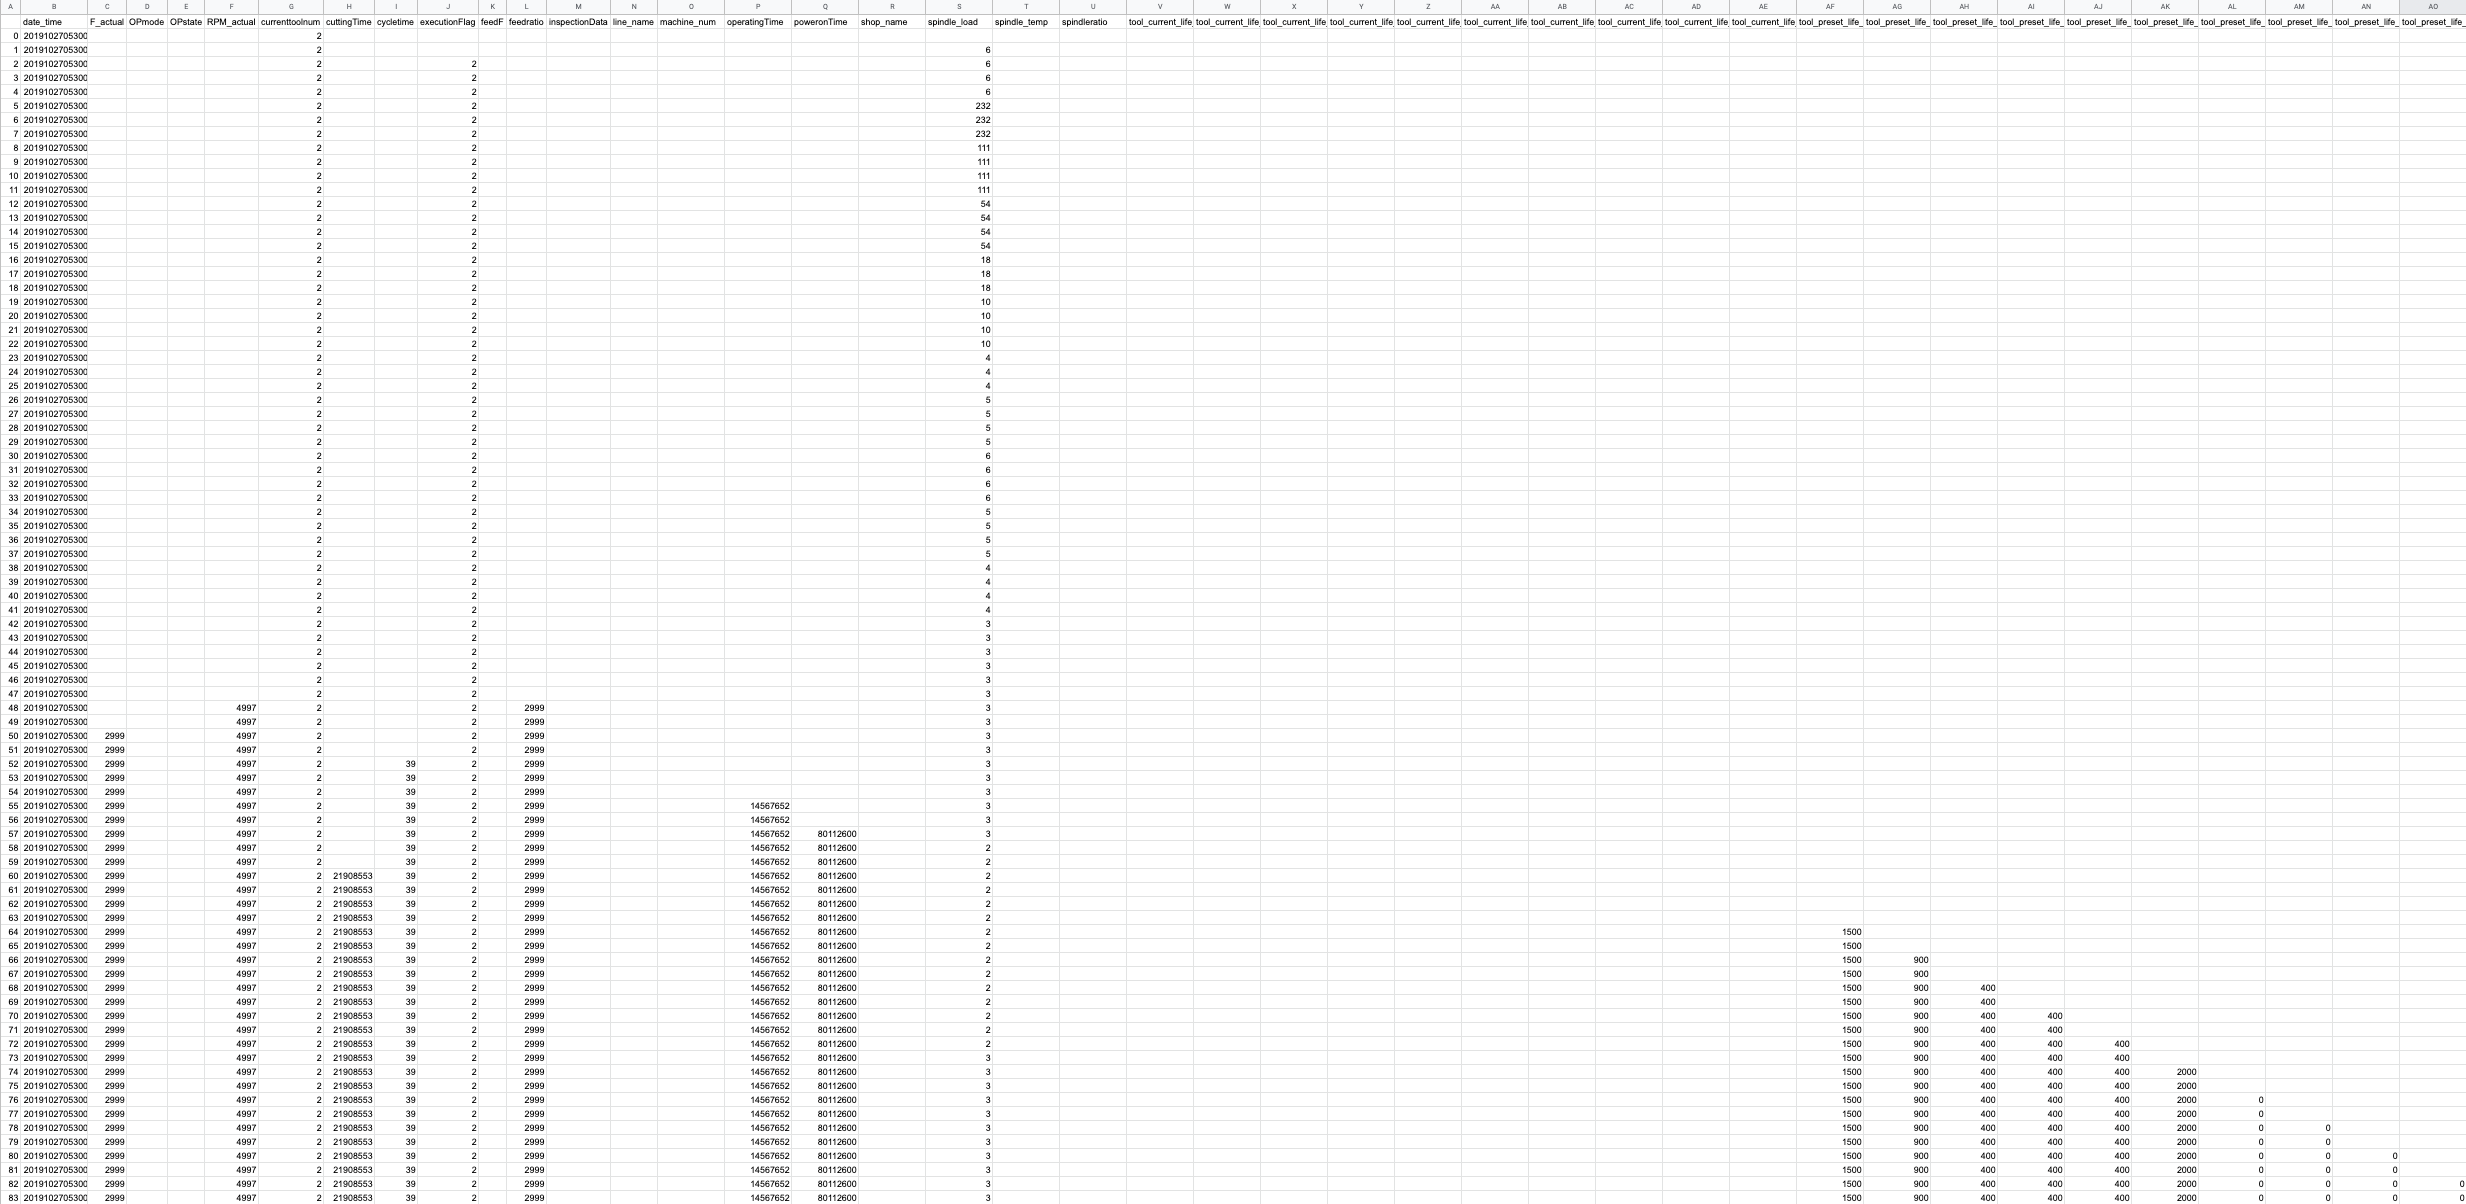

In [1]:
import pandas as pd
import numpy as np

# Import the file
raw_dataset = pd.read_table("data/cnc_logs/20191027.log", header = None)
raw_dataset

# If you have a large dataset, you may import by chunks:

# raw_df = pd.read_table(
#     "data/cnc_logs/20191027.log", 
#     chunksize = 1000, 
#     header = None
# )

# for raw_dataset in raw_df:
#     print(raw_dataset)

,0
0,"[2019-10-27 05:30:06,239] -- 192.168.11.59 Hea..."
1,"[2019-10-27 05:30:06,239] -- 192.168.11.59 Hea..."
2,"[2019-10-27 05:30:06,348] -- 192.168.11.59 Hea..."
3,"[2019-10-27 05:30:06,348] -- 192.168.11.59 Hea..."
4,"[2019-10-27 05:30:06,348] -- 192.168.11.59 Hea..."
...,...
995,"[2019-10-27 05:30:21,989] -- 192.168.11.59 Hea..."
996,"[2019-10-27 05:30:21,989] -- send end 20191027..."
997,"[2019-10-27 05:30:21,989] -- 192.168.11.59 Hea..."
998,"[2019-10-27 05:30:21,989] -- 192.168.11.59 Hea..."


In [2]:
# Convert the dataset into a list
dataset_list = list(raw_dataset[0])
dataset_list

['[2019-10-27 05:30:06,239] -- 192.168.11.59 Health  ?currenttoolnum   2?  ?20191027 053006 192?   1  Emergency           @1',
 '[2019-10-27 05:30:06,239] -- 192.168.11.59 Health  ?spindle_load   6?  ?20191027 053006 223?   1  Emergency           @0',
 '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?executionFlag   2?  ?20191027 053006 239?   1  Emergency           @5',
 '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?x_pos   390274?  ?20191027 053006 285?   1  Emergency           @4',
 '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?y_pos   -146537?  ?20191027 053006 285?   1  Emergency           @3',
 '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?z_pos   9400?  ?20191027 053006 285?   1  Emergency           @2',
 '[2019-10-27 05:30:06,348] -- 192.168.11.59 Health  ?send   send Start1 20191027053006301?  ?20191027 053006 301?   1  other           @1',
 '[2019-10-27 05:30:06,410] -- 192.168.11.59 Health  ?send   send Start2 20191027053006317?  ?20191027 053006 317

In [3]:
# Split the line by space, and only keep the first 14 columns of the dataframe
line_split = [line.split(' ')[:14] for line in dataset_list]
long_df = pd.DataFrame(line_split)
long_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[2019-10-27,"05:30:06,239]",--,192.168.11.59,Health,,?currenttoolnum,,,2?,,?20191027,053006,192?
1,[2019-10-27,"05:30:06,239]",--,192.168.11.59,Health,,?spindle_load,,,6?,,?20191027,053006,223?
2,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,?executionFlag,,,2?,,?20191027,053006,239?
3,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,?x_pos,,,390274?,,?20191027,053006,285?
4,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,?y_pos,,,-146537?,,?20191027,053006,285?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,?send,,,send,Start2,20191027053021801?,,?20191027
996,[2019-10-27,"05:30:21,989]",--,send,end,20191027053021817,,,,,,,,
997,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,?currenttoolnum,,,3?,,?20191027,053021,848?
998,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,?spindle_load,,,2?,,?20191027,053021,864?


In [4]:
# Remove question marks 
long_df[6] = list(map(lambda s: s.replace('?', ''), long_df[6]))
long_df[9] = list(map(lambda s: s.replace('?', ''), long_df[9]))
long_df[11] = list(map(lambda s: s.replace('?', ''), long_df[11]))
long_df[13] = list(map(lambda s: s.replace('?', ''), long_df[13]))
long_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[2019-10-27,"05:30:06,239]",--,192.168.11.59,Health,,currenttoolnum,,,2,,20191027,053006,192
1,[2019-10-27,"05:30:06,239]",--,192.168.11.59,Health,,spindle_load,,,6,,20191027,053006,223
2,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,executionFlag,,,2,,20191027,053006,239
3,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,x_pos,,,390274,,20191027,053006,285
4,[2019-10-27,"05:30:06,348]",--,192.168.11.59,Health,,y_pos,,,-146537,,20191027,053006,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,send,,,send,Start2,20191027053021801,,20191027
996,[2019-10-27,"05:30:21,989]",--,send,end,20191027053021817,,,,,,,,
997,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,currenttoolnum,,,3,,20191027,053021,848
998,[2019-10-27,"05:30:21,989]",--,192.168.11.59,Health,,spindle_load,,,2,,20191027,053021,864


In [5]:
# Get the columns we need
long_df = long_df.loc[:, [6, 9, 11, 12, 13]]
long_df

,6,9,11,12,13
0,currenttoolnum,2,20191027,053006,192
1,spindle_load,6,20191027,053006,223
2,executionFlag,2,20191027,053006,239
3,x_pos,390274,20191027,053006,285
4,y_pos,-146537,20191027,053006,285
...,...,...,...,...,...
995,send,send,20191027053021801,,20191027
996,,,,,
997,currenttoolnum,3,20191027,053021,848
998,spindle_load,2,20191027,053021,864


In [7]:
# Take all the observations from the column '6' that will be the column names of our output dataset
all_columns = list(set(long_df[6].tolist()))
print(all_columns)

['', 'line_name', 'cuttingTime', 'tool_current_life_14', 'spindle_load', 'feedF', 'tool_preset_life_13', 'x_pos', 'tool_preset_life_01', 'tool_preset_life_05', 'feedratio', 'tool_preset_life_03', 'spindle_temp', 'tool_current_life_03', 'F_actual', 'tool_current_life_05', 'machine_num', 'tool_current_life_01', 'send', 'tool_preset_life_11', 'tool_current_life_12', 'currenttoolnum', 'tool_preset_life_12', 'OPstate', 'inspectionData', 'tool_preset_life_14', 'tool_current_life_02', 'workcount', 'poweronTime', 'operatingTime', 'cycletime', 'y_pos', 'tool_current_life_04', 'shop_name', 'spindleratio', 'RPM_actual', 'executionFlag', 'tool_current_life_15', 'tool_current_life_11', 'tool_preset_life_15', 'z_pos', 'OPmode', 'tool_current_life_13', 'tool_preset_life_04', 'tool_preset_life_02']


In [8]:
# Remove the data we don't need from the column list
all_columns.remove('')
all_columns.remove('send')
all_columns.sort()
print(all_columns)

['F_actual', 'OPmode', 'OPstate', 'RPM_actual', 'currenttoolnum', 'cuttingTime', 'cycletime', 'executionFlag', 'feedF', 'feedratio', 'inspectionData', 'line_name', 'machine_num', 'operatingTime', 'poweronTime', 'shop_name', 'spindle_load', 'spindle_temp', 'spindleratio', 'tool_current_life_01', 'tool_current_life_02', 'tool_current_life_03', 'tool_current_life_04', 'tool_current_life_05', 'tool_current_life_11', 'tool_current_life_12', 'tool_current_life_13', 'tool_current_life_14', 'tool_current_life_15', 'tool_preset_life_01', 'tool_preset_life_02', 'tool_preset_life_03', 'tool_preset_life_04', 'tool_preset_life_05', 'tool_preset_life_11', 'tool_preset_life_12', 'tool_preset_life_13', 'tool_preset_life_14', 'tool_preset_life_15', 'workcount', 'x_pos', 'y_pos', 'z_pos']


In [9]:
# Reshape long_df from long to wide format and take the timestamp as our dataframe’s index
column_count = len(all_columns)
pre_time = ''
record = []
records_list = []

for line in dataset_list:
    str_list = line.split(' ')
    if str_list[6] != '' and str_list[6][0] == '?' and str_list[11][0] == '?':
        request = str_list[6][1:]
        if request in all_columns:
            date = str_list[11][1:5] + str_list[11][5:7] + str_list[11][7:]
            time = str_list[12][0:2] + str_list[12][2:4] + str_list[12][4:]
            millisec = str_list[13][:-1]
            cur_time = date + time + '.' + millisec
            response = str_list[9].replace('?', '')
            if cur_time != pre_time:
                if record != []:
                    records_list.append(record)
                record = [cur_time] + ['' for i in range(column_count)]
                pre_time = cur_time
            record[all_columns.index(request) + 1] = response
records_list.append(record)

df = pd.DataFrame(records_list, columns=['date_time'] + all_columns)
df

,date_time,F_actual,OPmode,OPstate,RPM_actual,currenttoolnum,cuttingTime,cycletime,executionFlag,feedF,...,tool_preset_life_05,tool_preset_life_11,tool_preset_life_12,tool_preset_life_13,tool_preset_life_14,tool_preset_life_15,workcount,x_pos,y_pos,z_pos
0,20191027053006.192,,,,,2,,,,,...,,,,,,,,,,
1,20191027053006.223,,,,,,,,,,...,,,,,,,,,,
2,20191027053006.239,,,,,,,,2,,...,,,,,,,,,,
3,20191027053006.285,,,,,,,,,,...,,,,,,,,390274,-146537,9400
4,20191027053006.489,,,,,2,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20191027053021.770,,,,,,,,2,,...,,,,,,,,,,
515,20191027053021.801,,,,,,,,,,...,,,,,,,,308800,-231286,-202480
516,20191027053021.848,,,,,3,,,,,...,,,,,,,,,,
517,20191027053021.864,,,,,,,,,,...,,,,,,,,,,


In [12]:
# Convert argument to a numeric type (The default return dtype is float64 or int64 depending on the data supplied)
df[all_columns] = df[all_columns].apply(pd.to_numeric, errors='ignore')

# Reset index
df = df.reset_index(drop=True)

# Replace empty values with NAN
df = df.replace('', np.nan)
df

,date_time,F_actual,OPmode,OPstate,RPM_actual,currenttoolnum,cuttingTime,cycletime,executionFlag,feedF,...,tool_preset_life_05,tool_preset_life_11,tool_preset_life_12,tool_preset_life_13,tool_preset_life_14,tool_preset_life_15,workcount,x_pos,y_pos,z_pos
0,20191027053006.192,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20191027053006.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20191027053006.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20191027053006.285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390274.0,-146537.0,9400.0
4,20191027053006.489,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20191027053021.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,20191027053021.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308800.0,-231286.0,-202480.0
516,20191027053021.848,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,20191027053021.864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Export to CSV
df.to_csv('output/df.csv')

In [13]:
# Fill up missing values
df = df.ffill()
df

,date_time,F_actual,OPmode,OPstate,RPM_actual,currenttoolnum,cuttingTime,cycletime,executionFlag,feedF,...,tool_preset_life_05,tool_preset_life_11,tool_preset_life_12,tool_preset_life_13,tool_preset_life_14,tool_preset_life_15,workcount,x_pos,y_pos,z_pos
0,20191027053006.192,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20191027053006.223,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20191027053006.239,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20191027053006.285,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390274.0,-146537.0,9400.0
4,20191027053006.489,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390274.0,-146537.0,9400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20191027053021.770,6857.0,NaN,2.0,176.0,3.0,21908563.0,51.0,2.0,NaN,...,400.0,2000.0,0.0,0.0,0.0,0.0,16797.0,308819.0,-251121.0,-207080.0
515,20191027053021.801,6857.0,NaN,2.0,176.0,3.0,21908563.0,51.0,2.0,NaN,...,400.0,2000.0,0.0,0.0,0.0,0.0,16797.0,308800.0,-231286.0,-202480.0
516,20191027053021.848,6857.0,NaN,2.0,176.0,3.0,21908563.0,51.0,2.0,NaN,...,400.0,2000.0,0.0,0.0,0.0,0.0,16797.0,308800.0,-231286.0,-202480.0
517,20191027053021.864,6857.0,NaN,2.0,176.0,3.0,21908563.0,51.0,2.0,NaN,...,400.0,2000.0,0.0,0.0,0.0,0.0,16797.0,308800.0,-231286.0,-202480.0


In [14]:
# Export to CSV
df.to_csv('output/df_new.csv')